**РК 1**

**Свечникова Анна, ИУ5-64Б**

**Вариант 11**

Задача 2

Набор данных 3 

# 1) Импорт библиотек и загрузка данных

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
od.download("https://www.kaggle.com/datasets/carlolepelaars/toy-dataset")

In [31]:
default_ds = pd.read_csv("toy-dataset/toy_dataset.csv")

# 2) Первичный анализ данных

In [32]:
#число строк и столбцов в датасете
default_ds.shape

(150000, 6)

In [33]:
#названия и типы столбцов, а также число ненулевых значений в столбце
default_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [34]:
# основные статистические характеристики
default_ds.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [35]:
default_ds.head(10)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
5,6,Dallas,Female,36,50786.0,No
6,7,Dallas,Female,32,33155.0,No
7,8,Dallas,Male,39,30914.0,No
8,9,Dallas,Male,51,68667.0,No
9,10,Dallas,Female,30,50082.0,No


Набор данных содержит следующие столбцы:
* Number - номер записи
* City - город проживания
* Gender - пол
* Age - возраст
* Income - доход
* Illnes - Yes, если человек болен, No, если не болен

Набор данных содержит как категориальные, так и количественные признаки. 

# 3) Добавление пропусков

Набор данных содержит пропусков, которые необходимы для выполнения задания. Добавим искусственно пропуски в столбцы Income и City, заменив 10% значений в этих столбцах на NaN.

In [36]:
# создадим копию датасета, которую будем "портить"
missed_ds = default_ds.copy()
missed_ds.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [37]:
# создадим массив случайных номеров строк
rand_nums = np.random.randint(0, 150000, 15000)
# используем метод pandas.DataFrame.loc для доступа к группе ячеек
missed_ds.loc[rand_nums, ["Income"]] = np.NaN

In [38]:
# Повторим для другого столбца
rand_nums = np.random.randint(0, 150000, 15000)
missed_ds.loc[rand_nums, ["City"]] = np.NaN

In [39]:
# проверим число пропусков
missed_ds.isnull().sum()

Number         0
City       14293
Gender         0
Age            0
Income     14330
Illness        0
dtype: int64

Фактически, мы получили меньше пропущенных значений, поскольку массив rand_nums содержит повторяющиеся значения.

# 4) Заполнение пропусков

Для заполнения пропусков в столбце Income, содержащем числовые данные, используем класс SimpleImputer из библиотеки scikit-learn и заменим пропуски значением медианы. Выберем медиану, а не среднее значение, т.к. на нее оказывают меньшее влияние выбросы.

In [41]:
inc_imputer = SimpleImputer(strategy="median", missing_values=np.nan)
arr1 = inc_imputer.fit_transform(missed_ds[["Income"]])
missed_ds["Income"] = arr1

Пропущенные значения в столбце City, содержащим категориальный признак, заменим на самое часто встречающееся значение. (Здесь использован fillna, потому что использование SimpleImputer с параметром strategy=most_frequent аналогично предыдущему шагу давало ошибку, с которой у меня не получилось разобраться)

In [43]:
missed_ds["City"].fillna(missed_ds["City"].mode()[0], inplace = True)

In [44]:
default_ds["City"].value_counts()

City
New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: count, dtype: int64

In [45]:
missed_ds["City"].value_counts()

City
New York City      59705
Los Angeles        29070
Dallas             17849
Mountain View      12890
Austin             11112
Boston              7569
Washington D.C.     7370
San Diego           4435
Name: count, dtype: int64

Видно, что число строк, в которых City = New York City, увеличилось.

In [46]:
# убедимся, что в наборе данных нет пропусков
missed_ds.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

# 5) График
Построим Скрипичную диаграмму для столбца Income, сгруппировав данные по значениям столбца Gender. Построим график для первой версии датасета и для версии с заполненными пропусками.

<Axes: xlabel='Income', ylabel='Gender'>

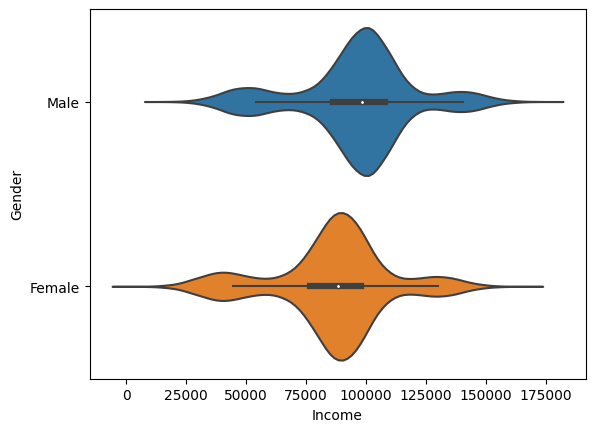

In [47]:
sns.violinplot(data = default_ds, x="Income", y="Gender")

<Axes: xlabel='Income', ylabel='Gender'>

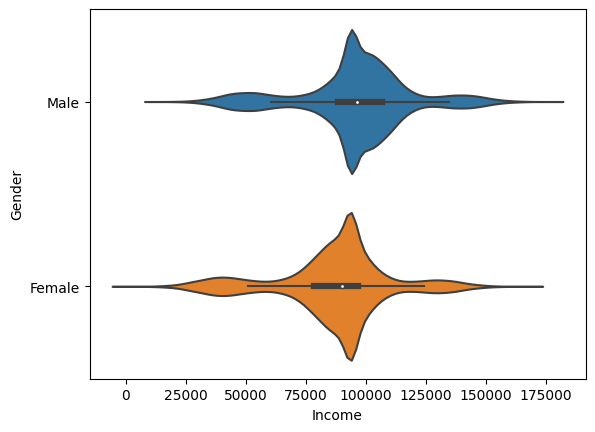

In [48]:
sns.violinplot(data = missed_ds, x="Income", y="Gender")

Распределение зачений признака стало менее плавным, т.к. были искусственно добавлены медианные значения. 

# 6) Вывод
Для дальнейшего построения моделей машинного обучения можно использовать все признаки, кроме Number, так как он не несет смысловой нагрузки и отражает только номер записи в наборе. В качестве целевого признака при прогнозировании можно использовать Illnes и определять, какой из факторов: город проживания, пол, возраст или уровень дохода сильнее влияет на наличие болезней.